In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#검수 전 데이터
train_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/train'
val_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/val'
test_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
    ,color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')



Found 78413 images belonging to 7 classes.
Found 16803 images belonging to 7 classes.
Found 16803 images belonging to 7 classes.


In [2]:
print(tf.__version__)

2.10.0


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2144785252953549224
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5758779392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1857282685621347587
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
tf.test.is_built_with_cuda()

True

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [7]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential


model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

Epoch 1/25
2450/2450 [==============================] - 125s 49ms/step - loss: 1.6660 - accuracy: 0.3467 - val_loss: 1.4195 - val_accuracy: 0.4403
Epoch 2/25
2450/2450 [==============================] - 113s 46ms/step - loss: 1.3835 - accuracy: 0.4573 - val_loss: 1.2802 - val_accuracy: 0.4951
Epoch 3/25
2450/2450 [==============================] - 106s 43ms/step - loss: 1.2784 - accuracy: 0.4999 - val_loss: 1.2802 - val_accuracy: 0.5066
Epoch 4/25
2450/2450 [==============================] - 105s 43ms/step - loss: 1.2035 - accuracy: 0.5334 - val_loss: 1.1468 - val_accuracy: 0.5539
Epoch 5/25
2450/2450 [==============================] - 103s 42ms/step - loss: 1.1353 - accuracy: 0.5623 - val_loss: 1.1478 - val_accuracy: 0.5685
Epoch 6/25
2450/2450 [==============================] - 103s 42ms/step - loss: 1.0793 - accuracy: 0.5855 - val_loss: 1.1264 - val_accuracy: 0.5612
Epoch 7/25
2450/2450 [==============================] - 99s 40ms/step - loss: 1.0294 - accuracy: 0.6054 - val_loss: 1.

In [9]:
model.evaluate(test_generator)


526/526 [==============================] - 24s 45ms/step - loss: 1.0043 - accuracy: 0.6430


[1.004263162612915, 0.6429803967475891]

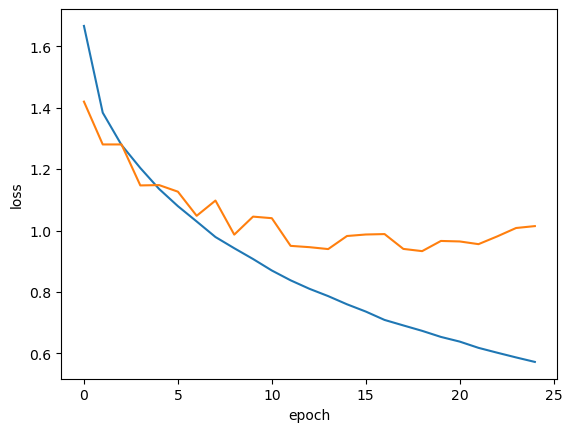

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()